## Grid granularity tuning

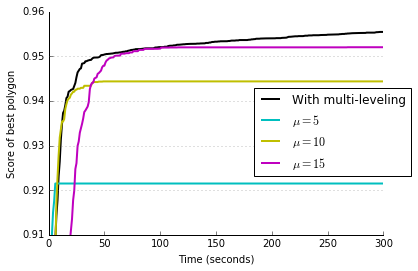

Final max values: [ 0.95544677  0.92148926  0.94436541  0.95201805]
Scores after 20 seconds: [ 0.94245781  0.92148926  0.94139718  0.91088821]


In [3]:
%matplotlib inline
import matplotlib
import numpy as np
import pickle
import os.path as osp
from cycler import cycler
from config import SAVE_DIR

from matplotlib import pyplot as plt

from acoc import acoc_plotter as plotter

data = pickle.load(open(osp.join('C:\\Users\Guro\Dropbox\ACOC\experiments\\', '02.19, multileveling server/results.pickle'), 'rb'))

data = np.array(data)
# data = data[1:7]
data = np.take(data, [0,2,3,4], axis=0)

data = data.T[0:300].T
x = range(data.shape[1])

labels = [
          'With multi-leveling', 
#           r'$\mu = 3$',
          r'$\mu = 5$', 
          r'$\mu = 10$', 
          r'$\mu = 15$',
          r'$\mu = 30$',
          r'$\mu = 60$'
         ]
fig, ax = plt.subplots()

plotter.hide_top_and_right_axis(ax)
ax.yaxis.grid(color='gray')
ax.set_xlabel('Time (seconds)')
ax.set_ylabel('Score of best polygon')
# ax.set_prop_cycle(cycler('color', ['c', 'm', 'y', 'k', 'r', 'g', 'b']))
ax.set_prop_cycle(cycler('color', ['k','c', 'y', 'm']) + cycler('lw', ['2','2','2','2']))
ax.set_ylim([0.91,0.96])

for i in range(data.shape[0]):
    plt.plot(x, data[i], label=labels[i])
    
#lgd = plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=4)
lgd = plt.legend(labels, loc='center right', bbox_to_anchor=(1.1, 0.46))
plt.show()

fig.savefig('multileveling_small_bw.eps', bbox_extra_artists=(lgd,), bbox_inches='tight')

print("Final max values: {}".format(np.amax(data, axis=1)))
seconds = 20
print("Scores after {} seconds: {}".format(seconds, data[:,seconds]))

(4, 100)


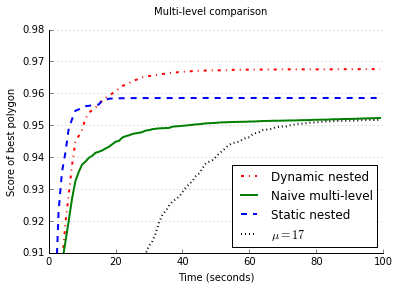

Final max values: [ 0.96761457  0.95229657  0.95854693  0.95172687]
Scores after 20 seconds: [ 0.96065274  0.94483328  0.95842664  0.88075118]


In [70]:
%matplotlib inline
import matplotlib
import numpy as np
import pickle
import os.path as osp
from cycler import cycler
from config import SAVE_DIR
#from PIL import Image
import matplotlib.cm as cm



from matplotlib import pyplot as plt

from acoc import acoc_plotter as plotter

data = pickle.load(open(osp.join(SAVE_DIR, '02.24, multilevel med nest grid/results.pickle'), 'rb'))
dynamic_nested = pickle.load(open('/Users/torrytufteland/Desktop/experiments/ML_2016-02-25_1623/results.pickle', 'rb'))

data = np.concatenate((np.array(dynamic_nested), np.array(data)))

print(np.array(data).shape)

x = range(data.shape[1])

labels = [
          'Dynamic nested',
          'Naive multi-level',
          'Static nested',
          r'$\mu = 17$'
         ]
fig, ax = plt.subplots()

plotter.hide_top_and_right_axis(ax)
fig.suptitle("Multi-level comparison")
ax.yaxis.grid(color='gray')
ax.set_xlabel('Time (seconds)')
ax.set_ylabel('Score of best polygon')
ax.set_prop_cycle(cycler('color', ['r','g', 'b', 'k']) + cycler('linestyle', ['-.','-', '--', ':']) + cycler('lw', ['2','2','2','2']))

ax.set_ylim([0.91,0.98])

for i in range(data.shape[0]):
    plt.plot(x, data[i], label=labels[i])
    
lgd = plt.legend(labels, loc='lower right')
plt.show()
filename = 'multileveling_large.eps'
fig.savefig(filename)

print("Final max values: {}".format(np.amax(data, axis=1)))
seconds = 20
print("Scores after {} seconds: {}".format(seconds, data[:,seconds]))